### *Importing Libraries and Loading Data*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data=pd.read_csv("framingham.csv")

In [3]:
data.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [4]:
data.shape

(4240, 16)

In [5]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
# Summary Statistics of Numerical Columns
data.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [8]:
# Load dataset
df = data.copy()  # Make a copy to avoid modifying the original dataset

In [9]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [10]:
df.shape

(4240, 16)

In [11]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### *Handling Missing Value*

In [12]:
# Check missing value
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
# Fill missing numerical values with median
df.fillna(df.median(), inplace=True)

In [14]:
# Now Check missing value
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### *Exploratory of Data Analysis*

In [15]:
# Summary Statistics of Numerical Columns
data.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [16]:
pd.pivot_table(data,values="education",index="male",aggfunc="max")

education
male           
0           4.0
1           4.0

In [17]:
df['heartRate'].value_counts()

heartRate
75.0     564
80.0     385
70.0     305
60.0     231
85.0     228
        ... 
47.0       1
130.0      1
140.0      1
51.0       1
46.0       1
Name: count, Length: 73, dtype: int64

In [18]:
top_10 = df['heartRate'].value_counts().head(10)
top_10

heartRate
75.0     564
80.0     385
70.0     305
60.0     231
85.0     228
72.0     222
65.0     197
90.0     172
68.0     151
100.0     98
Name: count, dtype: int64

### *Handling Outliers via IQR*

In [19]:
# Compute IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
# Remove outliers
data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [22]:
data_cleaned.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [23]:
data_cleaned.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   

   TenYearCHD  
0           0  
1           0  
2           0  
4           0  
5           0

In [24]:
data_cleaned.shape

(3142, 16)

In [25]:
print(f"Original shape: {data.shape}")
print(f"Cleaned shape: {data_cleaned.shape}")

Original shape: (4240, 16)
Cleaned shape: (3142, 16)


In [26]:
x = data_cleaned.drop("heartRate",axis=1)
y = data_cleaned["heartRate"]

In [27]:
x.shape

(3142, 15)

In [28]:
y.shape

(3142,)

In [29]:
y.head()

0    80.0
1    95.0
2    75.0
4    85.0
5    77.0
Name: heartRate, dtype: float64

In [30]:
np.corrcoef(x[x.columns[1]],y)

array([[ 1.        , -0.03492399],
       [-0.03492399,  1.        ]])

In [31]:
for i in range(0,15):
    print(i)
    print(x.columns[i])
    
    print(np.corrcoef(x[x.columns[i]],y))

0
male
[[ 1.         -0.13405975]
 [-0.13405975  1.        ]]
1
age
[[ 1.         -0.03492399]
 [-0.03492399  1.        ]]
2
education
[[nan nan]
 [nan  1.]]
3
currentSmoker
[[1.        0.0650141]
 [0.0650141 1.       ]]
4
cigsPerDay
[[nan nan]
 [nan  1.]]
5
BPMeds
[[nan nan]
 [nan  1.]]
6
prevalentStroke
[[nan nan]
 [nan  1.]]
7
prevalentHyp
[[1.         0.11216044]
 [0.11216044 1.        ]]
8
diabetes
[[nan nan]
 [nan  1.]]
9
totChol
[[nan nan]
 [nan  1.]]
10
sysBP
[[1.         0.15849348]
 [0.15849348 1.        ]]
11
diaBP
[[1.         0.16447964]
 [0.16447964 1.        ]]
12
BMI
[[nan nan]
 [nan  1.]]
13
glucose
[[nan nan]
 [nan  1.]]
14
TenYearCHD
[[nan nan]
 [nan  1.]]


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


### *Data Visualization*

In [32]:
sns.set()

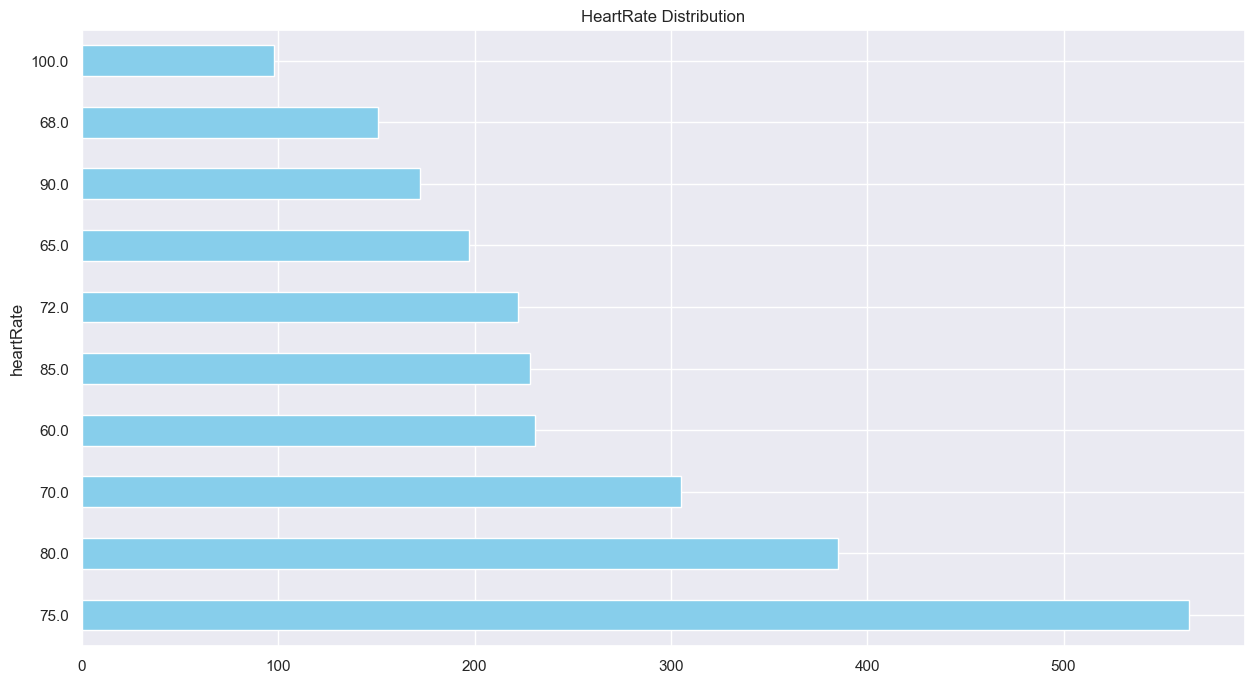

In [33]:
# Check target top 10 variable distribution
plt.figure(figsize=(15,8))
top_10.plot(kind='barh', color='skyblue')
plt.title('HeartRate Distribution')
plt.show()

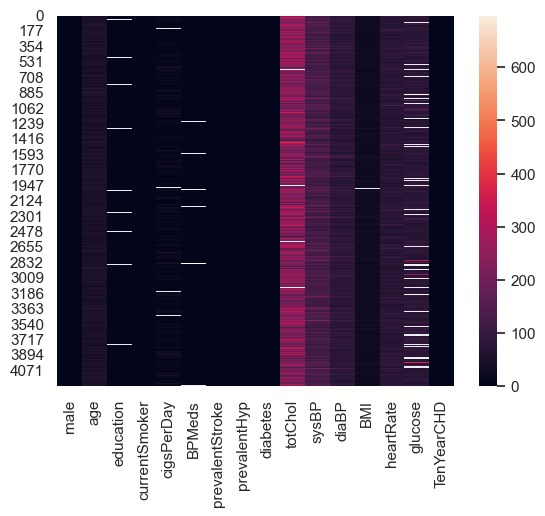

In [34]:
sns.heatmap(data)
plt.show()

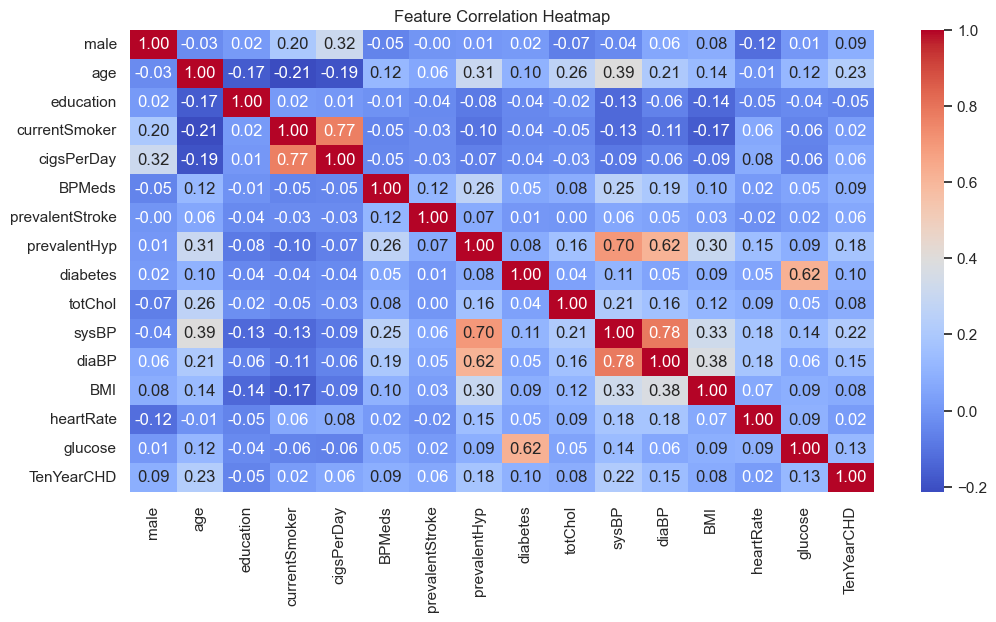

In [35]:
# Plot correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### *Feature Engineering*

In [36]:
x = data_cleaned[["cigsPerDay",'glucose','diaBP','BMI','totChol','sysBP','education','male']]
y = data_cleaned['heartRate']

In [37]:
x

cigsPerDay  glucose  diaBP    BMI  totChol  sysBP  education  male
0            0.0     77.0   70.0  26.97    195.0  106.0        4.0     1
1            0.0     76.0   81.0  28.73    250.0  121.0        2.0     0
2           20.0     70.0   80.0  25.34    245.0  127.5        1.0     1
4           23.0     85.0   84.0  23.10    285.0  130.0        3.0     0
5            0.0     99.0  110.0  30.30    228.0  180.0        2.0     0
...          ...      ...    ...    ...      ...    ...        ...   ...
4235        20.0     86.0   72.0  22.00    248.0  131.0        2.0     0
4236        15.0      NaN   87.0  19.16    210.0  126.5        1.0     0
4237         0.0    107.0   83.0  21.47    269.0  133.5        2.0     0
4238         0.0     72.0   98.0  25.60    185.0  141.0        3.0     1
4239        30.0     80.0   86.0  20.91    196.0  133.0        3.0     0

[3142 rows x 8 columns]

In [38]:
y

0       80.0
1       95.0
2       75.0
4       85.0
5       77.0
        ... 
4235    84.0
4236    86.0
4237    80.0
4238    67.0
4239    85.0
Name: heartRate, Length: 3142, dtype: float64

In [39]:
x.values

array([[  0. ,  77. ,  70. , ..., 106. ,   4. ,   1. ],
       [  0. ,  76. ,  81. , ..., 121. ,   2. ,   0. ],
       [ 20. ,  70. ,  80. , ..., 127.5,   1. ,   1. ],
       ...,
       [  0. , 107. ,  83. , ..., 133.5,   2. ,   0. ],
       [  0. ,  72. ,  98. , ..., 141. ,   3. ,   1. ],
       [ 30. ,  80. ,  86. , ..., 133. ,   3. ,   0. ]])

In [40]:
y.values

array([80., 95., 75., ..., 80., 67., 85.])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=1/3, random_state=42)

In [42]:
x_train.shape, x_test.shape,

((2094, 8), (1048, 8))

### *Model Building*

In [43]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [45]:
# Train the model
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

### *Model Evaluation*

In [46]:
# Predictions
y_pred = xgb_model.predict(x_test)

In [47]:
y_pred

array([80.38596 , 75.266785, 76.94005 , ..., 77.81281 , 74.04355 ,
       76.05004 ], dtype=float32)

In [48]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mae

8.939835493801205

In [49]:
mse = mean_squared_error(y_test, y_pred)
mse

125.61564619009732

In [50]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 8.94
Mean Squared Error: 125.62


In [51]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

In [52]:
feature_names = x.columns  

In [53]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

In [54]:
# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
7        male    0.273700
2       diaBP    0.118712
6   education    0.107207
4     totChol    0.106229
3         BMI    0.102624
5       sysBP    0.100291
0  cigsPerDay    0.095962
1     glucose    0.095274

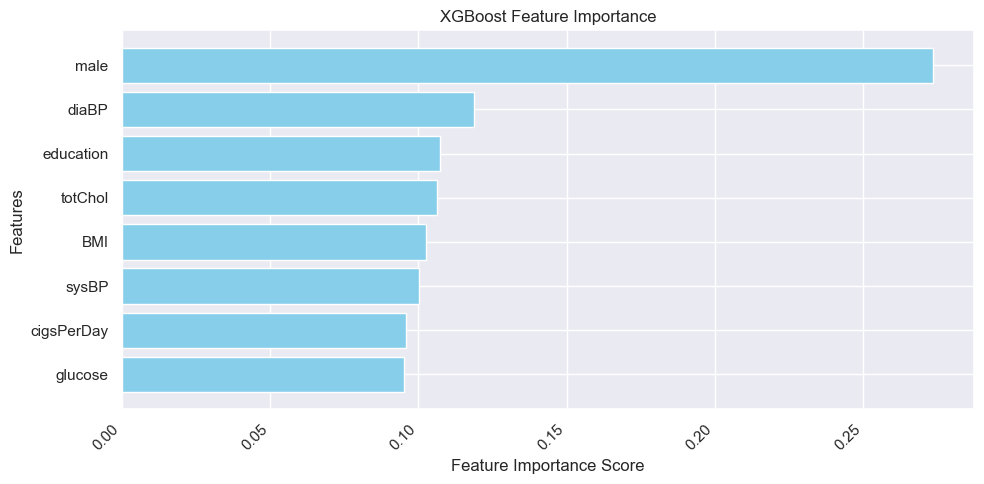

In [55]:
# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Invert axis to show most important feature at the top
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()